# Admon. de Riesgos Financieros

### Por Carlos Santillán

## Valor en Riesgo Paramétrico
## Portafolio de 2 activos


 
$d S_{1,t} = \mu_{1} S_{1, t} dt + \sigma_{1} S_{1, t} dW_{t}$

Donde $dW_{t}$ ~ $N(0,dt)$

Y recuérdese que $Cov(dW_{t}, dV_{t}) = \rho dt$

Así:

(Falta un chingo de apuntes, le tomé foto al cuaderno de Román)

$$E[\frac{d\Pi_{t}}{\Pi_{t}}] = E[\alpha_{1} \frac{dS_{1,t}}{S_{1,t}} + \alpha_{2} \frac{dS_{2,t}}{S_{2,t}}]$$

Otra vez fotos del pizarrón
...

$$Var(\frac{d\Pi_{t}}{\Pi_{t}}) = \frac{\alpha_{1}^{2}}{S_{1,t}^{2}} Var(dS_{1,t}) + \frac{\alpha_{2}^{2}}{S_{2,t}^{2}} Var(dS_{2,t})$$

$$=\frac{\alpha_{1}^{2}}{S_{1,t}^{2}} \sigma_{1}^{2} S_{1,t}^{2} Var(dW_{t})$$

...

**Resultado**
$$Cov(aX + bY, cW + dV)$$

$X, Y, W, V$ son variables aleatorias

Entonces:
$$ac Cov(X, W) + adCov(X, V) + bcCov(Y, W) + bdCov(Y, V)$$

$$ Var(\frac{d \Pi_{t}}{\Pi_{t}}) $$
$$= \alpha_{1}^{2} \sigma_{1}^{2}dt + \alpha_{2}^{2} \sigma_{2}^{2}dt $$
$$+ 2 \alpha_{1} \alpha_{2} \sigma_{1} \sigma_{2} \rho_{\frac{dS_{1,t}}{S_{1,t}}, \frac{dS_{2,t}}{S_{2,t}}}$$

$$-VaR_{\frac{d \Pi_{t}}{\Pi_{t}}} = \mu_{\frac{d \Pi_{t}}{\Pi_{t}}} - \sqrt{Var(\frac{d \Pi_{t}}{\Pi_{t}})} Z_{q}$$

Donde: $Var(\frac{d \Pi_{t}}{\Pi_{t}}) = \sqrt{\sigma^{2}_{\frac{d \Pi_{t}}{\Pi_{t}}}}$ 

In [1]:
import numpy as np                  # Vectores
import pandas as pd                 # DataFrames
import matplotlib.pyplot as plt     # Gráficas
import math                         # Operaciones
import seaborn as sns               # Gráficos y controles de Scrapping
import random                       # Muestreos aleatorios
import quandl                       # Datasets financieros

from scipy import stats             # Paquetería estadística
from scipy.stats import kstest      # Prueba de Kolmogorov-Smirnov
from scipy.stats import beta        # Distribución Beta
from scipy.stats import expon       # Distribución Exponencial
from scipy.stats import uniform     # Distribución uniforme
from scipy.stats import norm        # Distribución normal
from scipy.stats import binom       # Distribución Binomial

%matplotlib inline   

Vamos a trabajar con los datos de KOF y CEMEX:

In [3]:
### Leemos "KOF.xlsx" y "CEMEXCPO.MX" usando Pandas
datos_KOF = pd.read_excel('C:/Users/PC/Desktop/ULSA/7 Semestre/Admon de Riesgos/Parcial_2/KOF.xlsx', sheetname='KOF')
datos_CEMEX = pd.read_excel('C:/Users/PC/Desktop/ULSA/7 Semestre/Admon de Riesgos/Parcial_2/CEMEXCPO.MX.xlsx', sheetname='CEMEXCPO.MX (1)')

#datos_KOF
#datos_CEMEX

C:\Users\PC\AppData\Roaming\Python\Python36\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-27,13.10,13.35,13.10,13.32,13.161206,17468043
1,2018-09-28,13.23,13.36,13.01,13.14,12.983353,18345450
2,2018-10-01,13.21,13.52,13.19,13.36,13.200728,18258135
3,2018-10-02,13.33,13.44,13.10,13.12,12.963591,14672784
4,2018-10-03,13.12,13.22,12.95,12.99,12.835140,15776125
5,2018-10-04,13.02,13.02,12.55,12.66,12.509074,33282030
6,2018-10-05,12.66,12.66,12.10,12.13,11.985393,47318532
7,2018-10-08,12.10,12.11,11.85,12.06,11.916227,32036544
8,2018-10-09,12.05,12.21,11.81,12.18,12.034797,19033251
9,2018-10-10,12.18,12.18,11.90,11.93,11.787777,33197814


Observamos los tipos de dato por columna de KOF:

In [5]:
datos_KOF.dtypes
### KOF tiene 252 rows y 7 columnas

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Observamos los tipos de dato por columna de CEMEX:

In [6]:
datos_CEMEX.dtypes
### CEMEX tiene 251 rows y 7 columnas

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Cuando haya un desfase en las fechas, nos volamos para que coincidan

Nos vamos a quedar con 243

In [11]:
## En un nuevo dataframe, nos quedamos con los valores que coinciden en fecha
merge_KOF_CEMEX_fechas = pd.merge(datos_KOF, datos_CEMEX, on = 'Date', how='inner')

#merge_KOF_CEMEX_fechas

Nuestro merge tiene 244 rows
Veamos las variables que tenemos:

In [13]:
merge_KOF_CEMEX_fechas.dtypes


Date           datetime64[ns]
Open_x                float64
High_x                float64
Low_x                 float64
Close_x               float64
Adj Close_x           float64
Volume_x                int64
Open_y                float64
High_y                float64
Low_y                 float64
Close_y               float64
Adj Close_y           float64
Volume_y                int64
dtype: object

Obtengamos los *rendimientos logaritmicos* de cada uno:

In [24]:
### Pasamos los cierres ajustados a numpy para poder obtener el logaritmo
adjCloseKOF = np.asarray(merge_KOF_CEMEX_fechas['Adj Close_x'])
adjCloseCEMEX = np.asarray(merge_KOF_CEMEX_fechas['Adj Close_y'])

rendimientosKOF = np.zeros(len(adjCloseKOF-1))
rendimientosCEMEX = np.zeros(len(adjCloseCEMEX-1))

for i in range(len(adjCloseKOF)-1):
    rendimientosKOF[i] = np.log(adjCloseKOF[i+1] / adjCloseKOF[i])
    rendimientosCEMEX[i] = np.log(adjCloseCEMEX[i+1] / adjCloseCEMEX[i])

Pasamos los Numpy arrays a Pandas Series y anexamos a nuestro DataFrame

In [30]:
rendimientosKOFPd = pd.Series(rendimientosKOF)
rendimientosCEMEXPd = pd.Series(rendimientosCEMEX)

merge_KOF_CEMEX_fechas['Rend_KOF'] = rendimientosKOFPd
merge_KOF_CEMEX_fechas['Rend_CEMEX'] = rendimientosCEMEXPd

### Movemos las columnas de rendimientos un lugar hacia abajo:
merge_KOF_CEMEX_fechas['Rend_CEMEX'] = merge_KOF_CEMEX_fechas['Rend_CEMEX'].shift(+1)
merge_KOF_CEMEX_fechas['Rend_KOF'] = merge_KOF_CEMEX_fechas['Rend_KOF'].shift(+1)

0           NaN
1     -0.013606
2      0.016604
3     -0.018127
4     -0.009958
5     -0.025732
6     -0.042766
7     -0.005788
8      0.009901
9     -0.020739
10    -0.028051
11     0.014549
12     0.018519
13     0.009133
14    -0.022567
15    -0.044068
16     0.007042
17    -0.033901
18    -0.023876
19    -0.016870
20    -0.015238
21    -0.017425
22    -0.048009
23     0.036221
24     0.001974
25     0.070438
26     0.010059
27     0.006349
28     0.014363
29    -0.051200
         ...   
214   -0.034969
215    0.033249
216    0.015372
217    0.013468
218    0.013289
219    0.016367
220    0.003241
221    0.004843
222    0.031698
223    0.015480
224    0.095171
225    0.042385
226   -0.053621
227    0.042854
228    0.034578
229   -0.023811
230    0.030325
231    0.018019
232   -0.035046
233   -0.011960
234    0.018544
235    0.028462
236   -0.012837
237    0.002581
238    0.027956
239   -0.017700
240   -0.006398
241   -0.001285
242   -0.001286
243    0.001286
Name: Rend_CEMEX, Length

Visualizamos rendimientos de KOF:

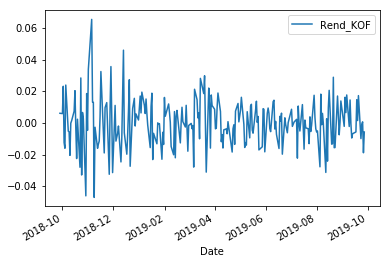

In [31]:
merge_KOF_CEMEX_fechas.plot(x='Date', y='Rend_KOF')

Visualizamos rendimientos de CEMEX:

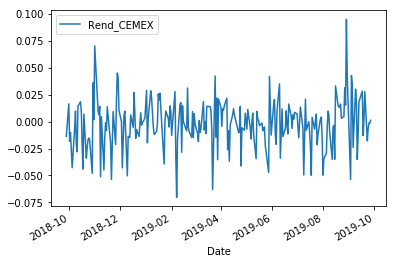

In [32]:
merge_KOF_CEMEX_fechas.plot(x='Date', y='Rend_CEMEX')